# **Lab2.2 : Image Enhancement with Statistical Operation** 

In this lab, you will execute two techniques: Image Histogram Equalization and Histogram Matching. Additionally, you will explore the pixel values of the image through a histogram.

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import ImageGrid

## **Histogram Equalization**
Read an image using OpenCV (Use your own image).

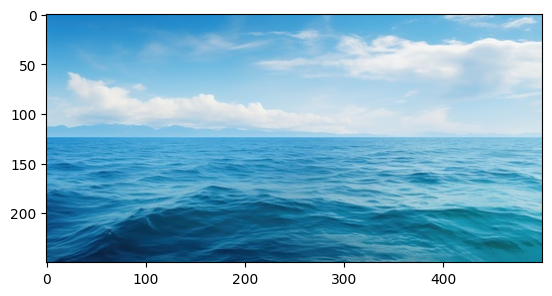

In [60]:
### START CODE HERE ###
img = cv2.imread('pic.jpg')
img = cv2.cvtColor(img,cv2.COLOR_RGB2BGR)

plt.imshow(img)
### END CODE HERE ###

Complete the `plot_histogram()` function below. This function returns the histogram of an image's pixel values, using `cv2.calcHist()`.

In [9]:
### START CODE HERE ###
def plot_histogram(image):
    hist = []

    for i in range(3): 
        temp = cv2.calcHist([image],[i],None,[256],[0,256])
        hist.append(temp)
    
    return hist
### END CODE HERE ###

Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image-2.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-1.png?raw=true)
</details>

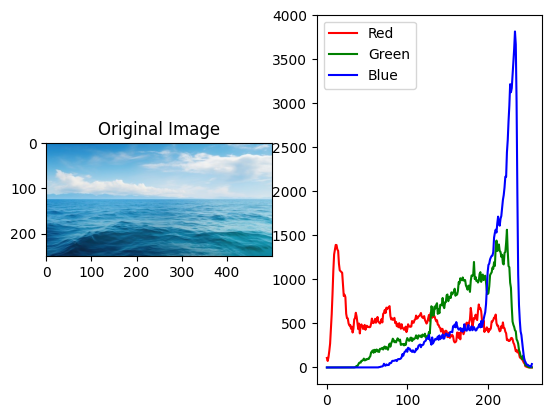

In [62]:
### START CODE HERE ###

fig, axs = plt.subplots(1,2)

axs[0].imshow(img)
axs[0].set_title('Original Image')

hist = plot_histogram(img)

axs[1].plot(hist[0],color='red',label='Red')
axs[1].plot(hist[1],color='green',label='Green')
axs[1].plot(hist[2],color='blue',label='Blue')
axs[1].legend()

plt.show()


### END CODE HERE ###

Now let's equalize the histogram of all channel using `cv2.equalizeHistogram()`<br/>
Display the output like the reference image below using subplot, where the first plot is the image and the second plot is the histogram of each channel that that has been equalized.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-2.png?raw=true)
</details>

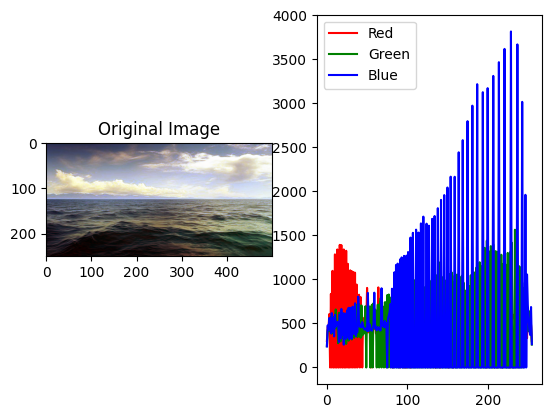

In [64]:
### START CODE HERE ###
equ_img = img.copy()
equ_img[:,:,0] = cv2.equalizeHist(equ_img[:,:,0])
equ_img[:,:,1] = cv2.equalizeHist(equ_img[:,:,1])
equ_img[:,:,2] = cv2.equalizeHist(equ_img[:,:,2])

fig, axs = plt.subplots(1,2)

axs[0].imshow(equ_img)
axs[0].set_title('Original Image')

hist = plot_histogram(equ_img)

# print(hist)
axs[1].plot(hist[0],color='red',label='Red')
axs[1].plot(hist[1],color='green',label='Green')
axs[1].plot(hist[2],color='blue',label='Blue')
axs[1].legend()

plt.show()







 
### END CODE HERE ###

## **Image Histogram Matching**
Read 2 images using OpenCV. Use your own images. One image will be the input image and the other will be the template image.

In [3]:
### START CODE HERE ###


img1 = cv2.imread('pic.jpg')
img2 = cv2.imread('pic2.jpg')

img1 = cv2.cvtColor(img1,cv2.COLOR_RGB2BGR)
img2 = cv2.cvtColor(img2,cv2.COLOR_RGB2BGR)

### END CODE HERE ###

Let's explore 2 images. Use suplot to plot :
- An image
- PDF(Probability Density Function) of each channel
- CDF(Cumulative Distribution Function) of each channel 

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-3.png?raw=true)
</details>

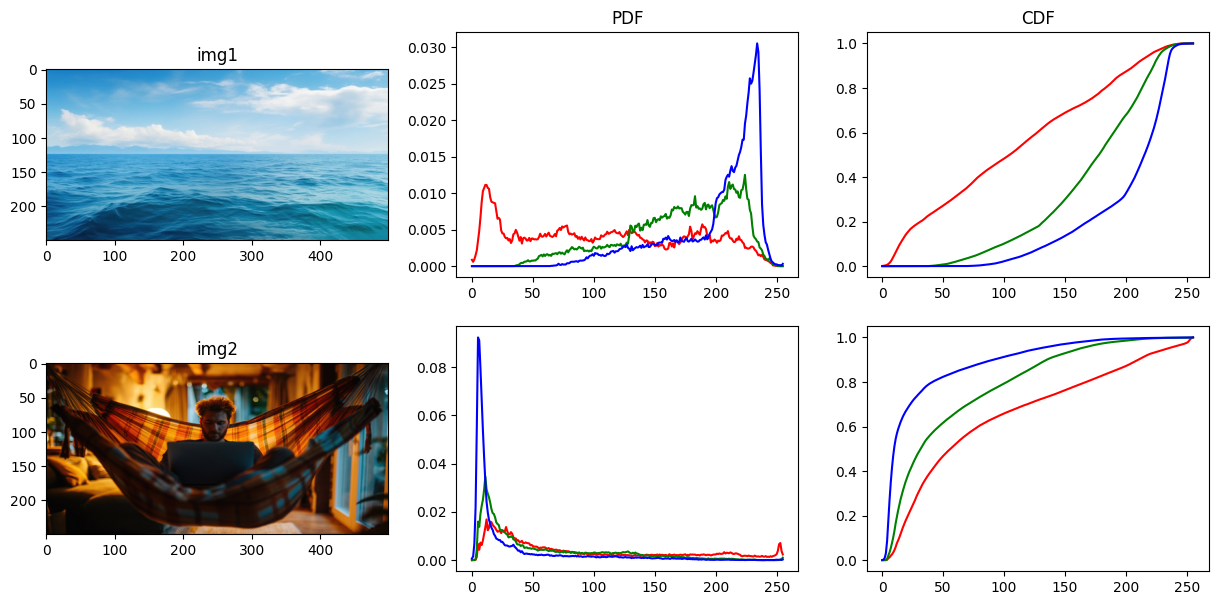

In [7]:
### START CODE HERE ###
def pdf_calculate(image):
    pdf_list = []
    for i in range(3):  #เอา RGB bin = 256 คือแกน x ที่เห็น ส่วน range คือขอบเขตเส้นกราฟที่จะให้เห็น ทั้งช่องภาพ
        hist, bins_count = np.histogram(image[:, :, i], bins=256, range=(0, 256)) #ใช้ desity = true ก็ได้ เพราะมันเอาค่าจุดสีที่นับได้ หารด้วยจำนวน px ทั้งหมดของภาพนั้น เช่น 847/(200x300) => 0.01411667
        pdf_list.append(hist/(image.shape[0]*image.shape[1])) #Normalized Histogram
    return pdf_list

def cdf_calculate(pdf):
    cdf = pdf.copy()
    for i in range(3):
        cdf[i] = np.cumsum(cdf[i]) #บวกสะสม
    return cdf

fig, axs = plt.subplots(2,3, figsize=(15, 7))
axs[0][0].imshow(img1)
axs[0][0].set_title("img1")
axs[1][0].imshow(img2)
axs[1][0].set_title("img2")

img1_pdf = pdf_calculate(img1)
img1_cdf = cdf_calculate(img1_pdf)
img2_pdf = pdf_calculate(img2)
img2_cdf = cdf_calculate(img2_pdf)

axs[0][1].plot(img1_pdf[0], color='red')
axs[0][1].plot(img1_pdf[1], color='green')
axs[0][1].plot(img1_pdf[2], color='blue')
axs[0][1].set_title("PDF")

axs[0][2].plot(img1_cdf[0], color='red')
axs[0][2].plot(img1_cdf[1], color='green')
axs[0][2].plot(img1_cdf[2], color='blue')
axs[0][2].set_title("CDF")

axs[1][1].plot(img2_pdf[0], color='red')
axs[1][1].plot(img2_pdf[1], color='green')
axs[1][1].plot(img2_pdf[2], color='blue')

axs[1][2].plot(img2_cdf[0], color='red')
axs[1][2].plot(img2_cdf[1], color='green')
axs[1][2].plot(img2_cdf[2], color='blue')

### END CODE HERE ###

Perform Histogram matching in the cell below.
Show the result like the reference image below.

<details>

<summary>
<font size="3" color="orange">
<b>Expected output</b>
</font>
</summary>

- The output should resemble this, but not be identical

![image.png](https://github.com/Digital-Image-Processing-Laboratory/image_processing-2024/blob/master/Lab2_Image-Enhancement/assets/2-4.png?raw=true)
</details>

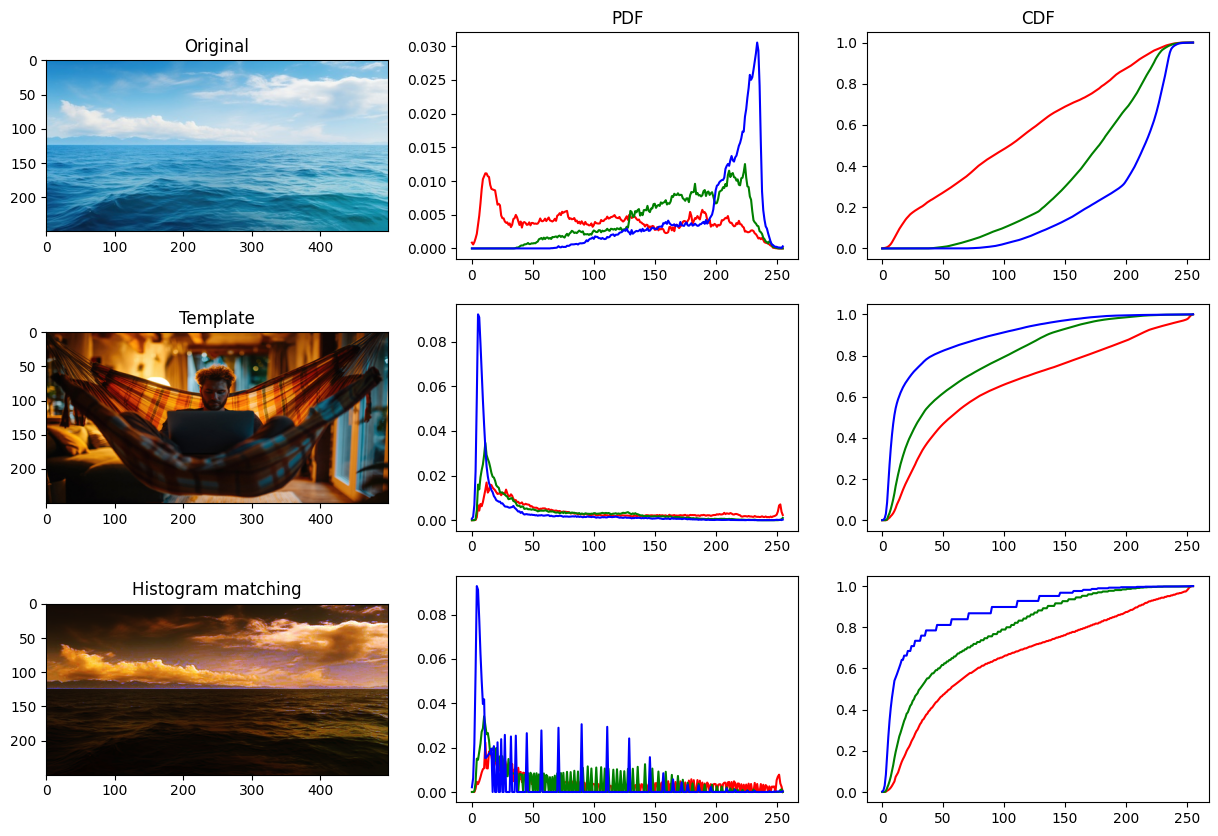

In [8]:
### START CODE HERE ###
def pdf_calculate(image):
    pdf_list = []
    for i in range(3):  #เอา RGB bin = 256 คือแกน x ที่เห็น ส่วน range คือขอบเขตเส้นกราฟที่จะให้เห็น ทั้งช่องภาพ
        hist, bins_count = np.histogram(image[:, :, i], bins=256, range=(0, 256)) #ใช้ desity = true ก็ได้ เพราะมันเอาค่าจุดสีที่นับได้ หารด้วยจำนวน px ทั้งหมดของภาพนั้น เช่น 847/(200x300) => 0.01411667
        pdf_list.append(hist/(image.shape[0]*image.shape[1])) #Normalized Histogram
    return pdf_list

def cdf_calculate(pdf):
    cdf = pdf.copy()
    for i in range(3):
        cdf[i] = np.cumsum(cdf[i]) #บวกสะสม
    return cdf

fig, axs = plt.subplots(3,3, figsize=(15, 10))
axs[0][0].imshow(img1)
axs[0][0].set_title("Original")
axs[1][0].imshow(img2)
axs[1][0].set_title("Template")

img1_pdf = pdf_calculate(img1)
img1_cdf = cdf_calculate(img1_pdf)
img2_pdf = pdf_calculate(img2)
img2_cdf = cdf_calculate(img2_pdf)

axs[0][1].plot(img1_pdf[0], color='red')
axs[0][1].plot(img1_pdf[1], color='green')
axs[0][1].plot(img1_pdf[2], color='blue')
axs[0][1].set_title("PDF")

axs[0][2].plot(img1_cdf[0], color='red')
axs[0][2].plot(img1_cdf[1], color='green')
axs[0][2].plot(img1_cdf[2], color='blue')
axs[0][2].set_title("CDF")

axs[1][1].plot(img2_pdf[0], color='red')
axs[1][1].plot(img2_pdf[1], color='green')
axs[1][1].plot(img2_pdf[2], color='blue')

axs[1][2].plot(img2_cdf[0], color='red')
axs[1][2].plot(img2_cdf[1], color='green')
axs[1][2].plot(img2_cdf[2], color='blue')

image_result = np.zeros((img1.shape)).astype(np.uint8) # create zero array shape img1

# Histogram matching
for channel in range(3):
    pixel = np.arange(256)
    new_pixels = np.interp(img1_cdf[channel], img2_cdf[channel], pixel) #ทำให้ค่าของสีในภาพ input ใกล้เคียงกับ template (แปลง cdf ของ input ให้ใกล้เคียงกับของ template)
    image_result[:,:,channel] = (np.reshape(new_pixels[img1[:,:,channel].ravel()], img1[:,:,channel].shape)).astype(np.uint8) #ทำให้ภาพที่ได้เป็นภาพแบบเดิมและขนาดเท่าเดิม


axs[2][0].imshow(image_result)
axs[2][0].set_title("Histogram matching")

image_result_pdf = pdf_calculate(image_result)
image_result_cdf = cdf_calculate(image_result_pdf)

axs[2][1].plot(image_result_pdf[0], color='red')
axs[2][1].plot(image_result_pdf[1], color='green')
axs[2][1].plot(image_result_pdf[2], color='blue')

axs[2][2].plot(image_result_cdf[0], color='red')
axs[2][2].plot(image_result_cdf[1], color='green')
axs[2][2].plot(image_result_cdf[2], color='blue')




### END CODE HERE ###

---

## **Questions**
1. If an image having a dense histogram concentrated at high intensity, how would an image appear when you display on a device.
2. If we want to enhance the image explained in question 1 using histogram matching, how would the histogram of the template image should be?
3. How would we enhance an image having too bright in some area and too dark in another area?